# DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist `min_samples` other samples within a distance of `eps`, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least `eps` in distance from any core sample, is considered an outlier by the algorithm.

- A point p is a core point if at least `min_samples` points are within distance `eps` of it (including p).
- A point q is directly reachable from p if point q is within distance `eps` from core point p. Points are only said to be directly reachable from core points.
- A point q is reachable from p if there is a path p1, ..., pn with p1 = p and pn = q, where each pi+1 is directly reachable from pi. Note that this implies that the initial point and all points on the path must be core points, with the possible exception of q.
- All points not reachable from any other point are outliers or noise points.

<div style="text-align:center"><img decoding="async" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20100%200'%3E%3C/svg%3E" alt="Figure" width="100%" data-lazy-src="//miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif" /><noscript><img decoding="async" src="//miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif" alt="Figure" width="100%" /></noscript><br/>
<font size="-1"></p>
<div class="caption"><a href="https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/" rel="noopener" target="_blank">DBSCAN in action</a></div>

In [2]:
# things we will need to do stuff in this notebook
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import DBSCAN

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")



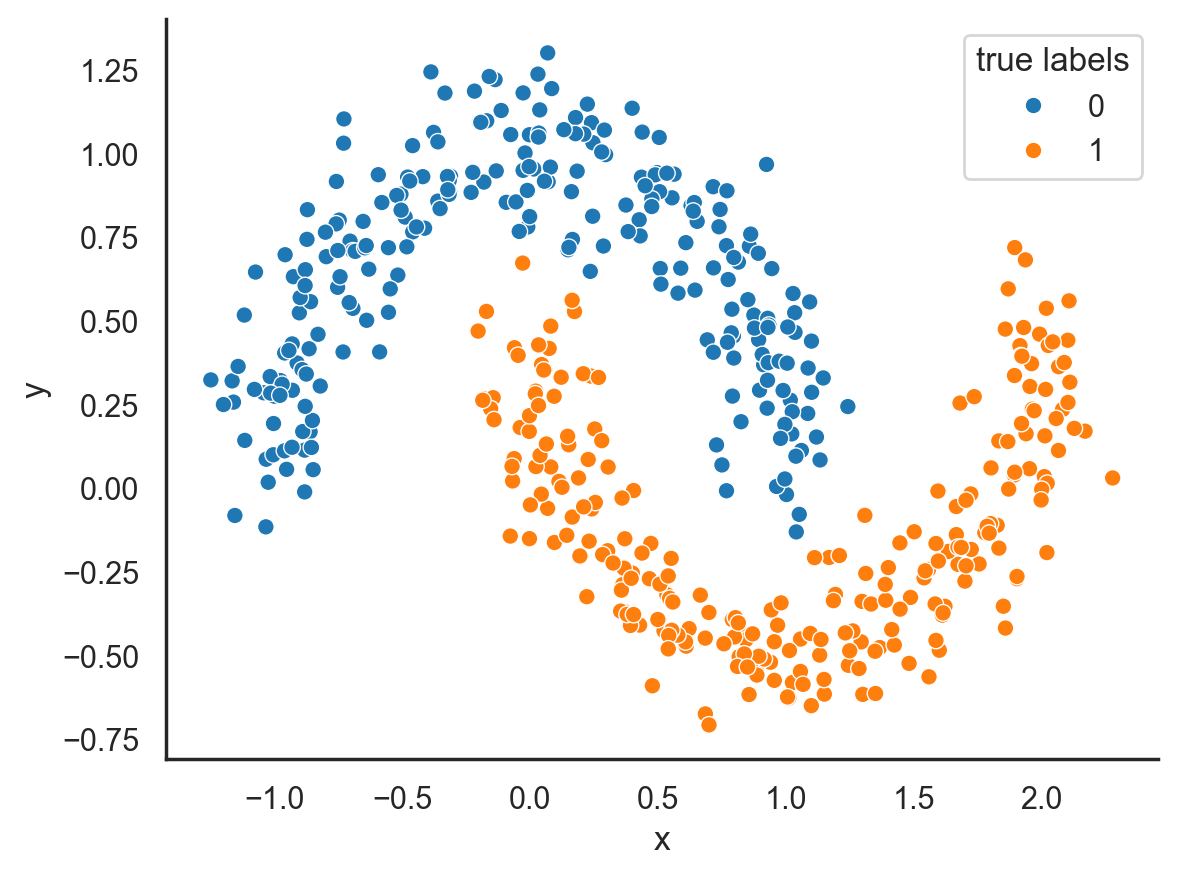

In [3]:
data, true_labels = make_moons(n_samples=500, noise=0.12, random_state=619)
df = pd.DataFrame(data,columns=['x','y'])
df['true labels']=true_labels


sns.scatterplot(data=df, x='x', y='y', hue='true labels');
sns.despine()

A useful link: [DBSCAN docs in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

Estimated number of clusters: 2
Estimated number of noise points: 3
Adjusted Rand Index: 0.964
Silhouette Coefficient: 0.161


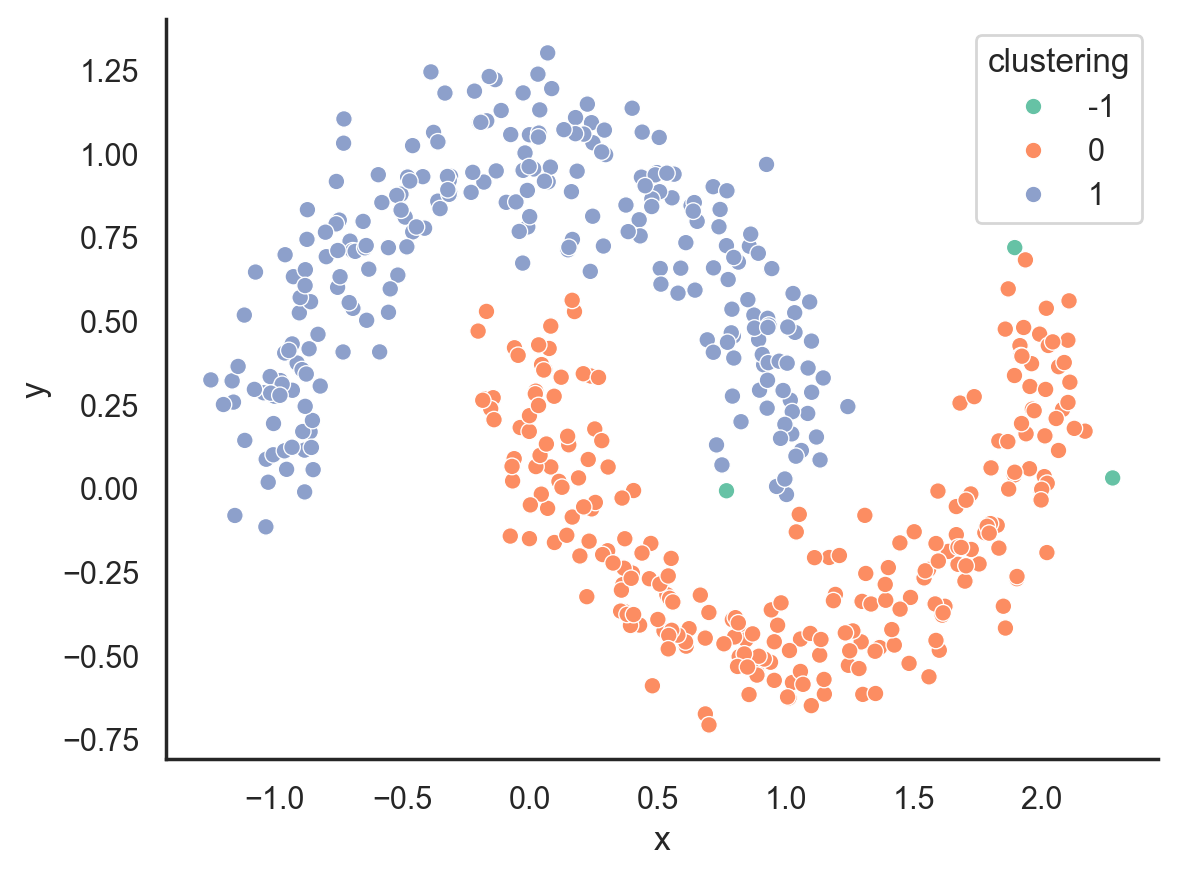

In [9]:
# OK it's your job to make this clustering work!
# explore different parameter values manually

# insert your code in place of `...` below
db = DBSCAN(eps = .191, min_samples= 10).fit(data)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Adjusted Rand Index: {adjusted_rand_score(true_labels, labels):.3f}")
try:
    print(f"Silhouette Coefficient: {silhouette_score(data, labels):.3f}")
except ValueError:
    print('Seems like you only got 1 cluster, so Silhoutte cannot be calculated')


df['clustering']=labels
sns.scatterplot(data=df, x='x', y='y', hue='clustering', 
                palette=sns.color_palette("Set2",n_clusters_+1));
sns.despine()



# Extending DBSCAN

One of the limitations of DBSCAN is that the density parameters `min_samples` and `eps` are fixed.  But what if your dataset has both high density and low density clusters simultaneously?  Pick those values too far in one direction and you will lose the clusters that are the opposite type.

So can we come up with a way to make DBSCAN sensitive to clusters with variable density? Yep, one such way is HDBSCAN

Let's explore this in more depth using a great demo somebody else already made
https://pberba.github.io/stats/2020/07/08/intro-hdbscan/

And here is an explanation of the computation involved
https://scikit-learn.org/stable/modules/clustering.html#mutual-reachability-graph

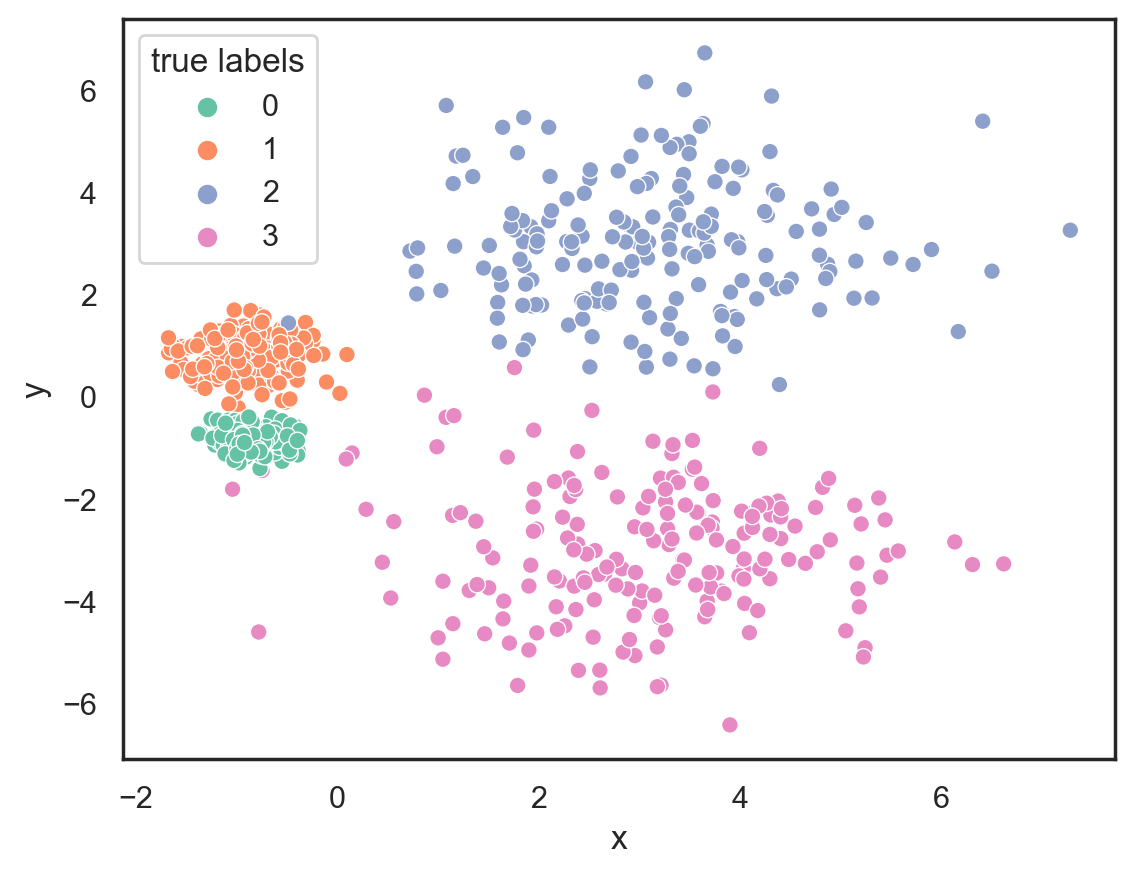

In [ ]:
# your turn!  check out the following dataset

centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)

vard = pd.DataFrame(X, columns=['x','y'])
vard['true labels']= labels_true
sns.scatterplot(data=vard, x='x', y='y', hue='true labels',
               palette=sns.color_palette("Set2",len(centers)));

In [ ]:
# bet you can't make this work!!

raise NotImplemented
db = DBSCAN(...).fit(data)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Adjusted Rand Index: {adjusted_rand_score(true_labels, labels):.3f}")
try:
    print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")
except ValueError:
    print('Seems like you only got 1 cluster, so Silhoutte cannot be calculated')


df['clustering']=labels
sns.scatterplot(data=df, x='x', y='y', hue='clustering', 
                palette=sns.color_palette("Set2",n_clusters_));
sns.despine()

In [ ]:
# this only works if your sklearn is new enough!!
from sklearn.clusters import HDBSCAN
# do it!

raise NotImplemented
db = HDBSCAN(...).fit(data)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Adjusted Rand Index: {adjusted_rand_score(true_labels, labels):.3f}")
try:
    print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")
except ValueError:
    print('Seems like you only got 1 cluster, so Silhoutte cannot be calculated')


df['clustering']=labels
sns.scatterplot(data=df, x='x', y='y', hue='clustering', 
                palette=sns.color_palette("Set2",n_clusters_));
sns.despine()